In [ ]:
# cos_sim : 추천 시스템

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data = pd.read_csv("datasets/movies_metadata.csv", low_memory=False)
data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
# 영화제목과 소개 데이터 오버뷰
data[['original_title', 'overview']]

,original_title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...
45461,رگ خواب,Rising and falling between a man and woman.
45462,Siglo ng Pagluluwal,An artist struggles to finish his work while a...
45463,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,Satana likuyushchiy,"In a small town live two brothers, one a minis..."


In [8]:
# 데이터 갯수 확인
data = data[['original_title', 'overview']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  45466 non-null  object
 1   overview        44512 non-null  object
dtypes: object(2)
memory usage: 710.5+ KB


In [9]:
# 발생한 결측치 확인
45466 - 44512

954

In [12]:
# 결측치가 있는 대상을 드롭
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44512 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  44512 non-null  object
 1   overview        44512 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [11]:
# 데이터의 크기 산출
tfidf_vec = TfidfVectorizer(stop_words="english") # english는 불용어로
tfidf_dtm = tfidf_vec.fit_transform(data['overview'])
tfidf_dtm

<44512x75827 sparse matrix of type '<class 'numpy.float64'>'
	with 1210882 stored elements in Compressed Sparse Row format>

In [13]:
# 44512개의 문장을 44512개의 문장과 비교
cos_sim_res = cosine_similarity(tfidf_dtm, tfidf_dtm) 

In [15]:
# 영화제목을 기준으로 인덱스 설정
title_to_index = dict(zip(data["original_title"] , data.index))
title_to_index

{'Toy Story': 0,
 'Jumanji': 1,
 'Grumpier Old Men': 2,
 'Waiting to Exhale': 3,
 'Father of the Bride Part II': 4,
 'Heat': 29042,
 'Sabrina': 888,
 'Tom and Huck': 7,
 'Sudden Death': 8,
 'GoldenEye': 9,
 'The American President': 10,
 'Dracula: Dead and Loving It': 11,
 'Balto': 12,
 'Nixon': 13,
 'Cutthroat Island': 14,
 'Casino': 15,
 'Sense and Sensibility': 41042,
 'Four Rooms': 17,
 'Ace Ventura: When Nature Calls': 18,
 'Money Train': 19,
 'Get Shorty': 20,
 'Copycat': 21,
 'Assassins': 22,
 'Powder': 23,
 'Leaving Las Vegas': 24,
 'Othello': 21274,
 'Now and Then': 26,
 'Persuasion': 40837,
 'La Cité des Enfants Perdus': 28,
 '摇啊摇，摇到外婆桥': 29,
 'Dangerous Minds': 30,
 'Twelve Monkeys': 31,
 'Babe': 33,
 'Carrington': 34,
 'Dead Man Walking': 35,
 'Across the Sea of Time': 36,
 'It Takes Two': 29129,
 'Clueless': 38,
 'Cry, the Beloved Country': 26667,
 'Richard III': 17719,
 'Dead Presidents': 41,
 'Restoration': 38571,
 'Mortal Kombat': 43,
 'To Die For': 44,
 'How To Make An

In [16]:
title_to_index['Toy Story'], title_to_index['Jumanji']

(0, 1)

In [24]:
# 추천 함수 정의
def get_recommendation(title, n):
    idx = title_to_index[title]
    sim_scores = list(enumerate(cos_sim_res[idx]))
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse=True) # 코사인 유사도 역순으로 정렬
    sim_scores_n = sim_scores[1:n+1] # 추천받을 영화 갯수
    movie_idx = [movie_dict[0] for movie_dict in sim_scores_n] # 영화 인덱스 설정
    return data["original_title"].iloc[movie_idx]

In [25]:
get_recommendation("Toy Story", 5)

15348                    Toy Story 3
2997                     Toy Story 2
10301         The 40 Year Old Virgin
24523                      Small Fry
23843    Andy Hardy's Blonde Trouble
Name: original_title, dtype: object

In [30]:
get_recommendation("Batman", 5)

8681                 Scars of Dracula
18562    Johnny Cash at Folsom Prison
6600        The Prince and the Pauper
5355     Nosferatu: Phantom der Nacht
37915                          Vaesen
Name: original_title, dtype: object

In [ ]:
# word2vec, 임베딩

In [31]:
train_data = pd.read_table("datasets/ratings.txt")
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [34]:
# 결측치 제거
train_data = train_data.dropna()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [35]:
# 한글 이외 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "") # ㄱ~힣에 해당하지 않으면 공백으로

C:\Users\user\AppData\Local\Temp\ipykernel_5236\621637808.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "") # ㄱ~힣에 해당하지 않으면 공백으로
C:\Users\user\AppData\Local\Temp\ipykernel_5236\621637808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "") # ㄱ~힣에 해당하지 않으면 공백으로


In [36]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ,0
199996,3302770,쓰레기,0
199997,5458175,완전 사이코영화 마지막은 더욱더 이 영화의질을 떨어트린다,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [37]:
from konlpy.tag import Okt
okt = Okt()

In [39]:
stopwords = ["외","가","이","은","는",
                     "돌","좀","잘","강","과",
                     "도","를","으로","자","에",
                     "와","한","하다"]

In [41]:
toked_data = []
i = 0
for sen in train_data["document"]:
    if i % 100==0: # 진행되는동안 . 출력
        print(".", end="")
    i+=1
    toked_sen = okt.morphs(sen, stem=True) # 문장의 형태소를 알아냄 
    toked_data_wo_stop = [word for word in toked_sen if not word in stopwords] # 필터링 리스트는 제외함
    toked_data.append(toked_data_wo_stop)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [43]:
len(toked_data)

199992

In [45]:
# 가장 긴 리뷰
max(len(review) for review in toked_data)

73

In [46]:
# 가장 짧은 리뷰
min(len(review) for review in toked_data)

0

In [48]:
sum(len(review) for review in toked_data)/len(toked_data)

11.046841873674946

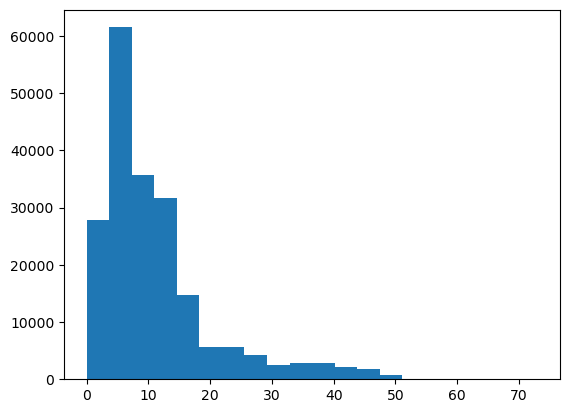

In [49]:
# 분포 현황
import matplotlib.pyplot as plt
plt.hist([len(review) for review in toked_data], bins=20)
plt.show()

In [51]:
# !pip install gensim

In [55]:
# 압축된 희소행렬 형태로 변환
# 임베딩 행렬 (단어수, 변환)
from gensim.models import Word2Vec 
model = Word2Vec(sentences = toked_data, vector_size=100, window=5, min_count=5, sg=0)
model.wv.vectors.shape

(16477, 100)

In [56]:
model.wv.vectors

array([[-0.2352172 , -0.28378126,  1.3987991 , ..., -1.1268619 ,
        -0.882099  ,  1.5047126 ],
       [-1.5915438 , -0.87091434,  1.0292625 , ..., -0.4612734 ,
        -2.991244  ,  1.2857127 ],
       [ 0.70760286, -0.23741728, -1.7369014 , ..., -0.030136  ,
         0.4193482 , -1.1400197 ],
       ...,
       [-0.12777695,  0.12663986, -0.0435105 , ..., -0.0971241 ,
        -0.06405452, -0.04452984],
       [-0.02331068,  0.0967635 , -0.01172993, ..., -0.03673331,
        -0.02233911, -0.04884121],
       [-0.0731975 ,  0.05294745,  0.04708572, ..., -0.06840213,
         0.00707239, -0.01554432]], dtype=float32)

In [57]:
model.wv.most_similar("송혜교")

[('수애', 0.8698798418045044),
 ('남상미', 0.8628445863723755),
 ('이민정', 0.8604693412780762),
 ('한효주', 0.8591671586036682),
 ('한지혜', 0.8590437769889832),
 ('피트', 0.854720950126648),
 ('송윤아', 0.8515031933784485),
 ('누님', 0.8502995371818542),
 ('성준', 0.8493302464485168),
 ('제레미', 0.848747193813324)]

In [58]:
# 구글 뉴스에 나온 단어 뉘앙스의 유사도 알아보기
# 미리 훈련된 데이터셋을 가져옴
import gensim
pre_trained_word2vec = gensim.models.KeyedVectors.load_word2vec_format(
    "datasets/GoogleNews-vectors-negative300.bin", binary=True)

In [59]:
pre_trained_word2vec.vectors.shape
# 단어 300000, 차원 300

(3000000, 300)

In [61]:
# 단어간 유사도 출력
pre_trained_word2vec.similarity("this", "is")

0.40797034

In [62]:
pre_trained_word2vec.similarity("food", "book")

0.101712584

In [64]:
pre_trained_word2vec.similarity("chicken", "pizza")

0.3798493